In [2]:
# dependencies
import os
import sys
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import seaborn as sns

sns.set()
sns.set_style("dark")
# sns.set_style("whitegrid")
sns.set_context("paper", font_scale=4, rc={"lines.linewidth": 4})
mpl.rcParams['lines.linewidth'] = 3

In [3]:
import pyvista as pv
import geopandas as gpd
from shapely.geometry import Point
from descartes import PolygonPatch

In [4]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

In [5]:
import random
import datetime

# Texas with county

In [6]:
tx_county_shp = gpd.read_file("data/shp/County.shp")
# print(tx_county_shp)

In [7]:
county_nbr = tx_county_shp['CNTY_NBR']
county_nm = tx_county_shp['CNTY_NM']
county_dist = tx_county_shp['DIST_NBR']
county_dist_names = tx_county_shp['DIST_NM']
# county_nbr, county_nm, county_dist
# len(county_nm)

In [8]:
county_geom = tx_county_shp['geometry']
# county_geom

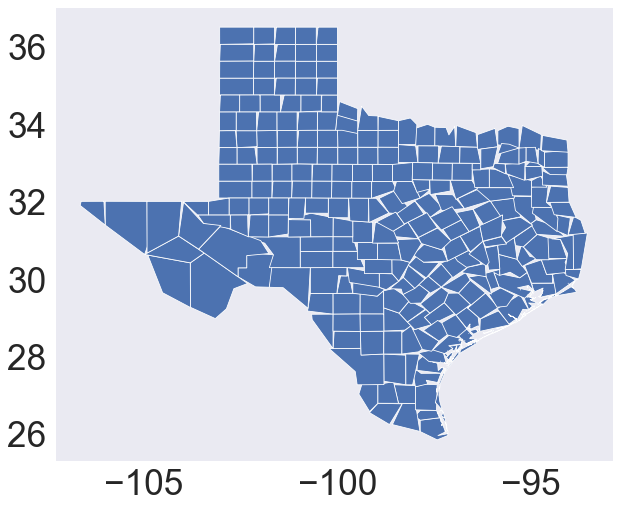

In [9]:
county_geom.plot(figsize=(10, 10))
plt.show()

## Collect polygons with same county number

In [10]:
N_polys = len(county_nm)
N_counties = 254
new_county_polys = [[] for i in range(N_counties)]
new_county_nms = ['' for i in range(N_counties)]
new_county_dist = [0 for i in range(N_counties)]
new_county_dist_names = ['' for i in range(N_counties)]
for i in range(len(county_nbr)):
    # find its county id
    cid = county_nbr[i]-1
    
    # polygon goes to cid^th place
    new_county_polys[cid].append(county_geom[i])
    
    # modify the name of cid county
    new_county_nms[cid] = county_nm[i]
    
    # get district this county belongs to
    new_county_dist[cid] = county_dist[i] - 1
    new_county_dist_names[cid] = county_dist_names[i]
    
print('size of new_county_polys: {}'.format(len(new_county_polys)))
print('size of new_county_nms: {}'.format(len(new_county_nms)))

size of new_county_polys: 254
size of new_county_nms: 254


In [11]:
# save county data to file for later use
#fcpoly = open('county_data/county_polygons.txt', 'w')
fcname = open('data/county_names.txt', 'w')
fcdist = open('data/county_districts.txt', 'w')
fcdistnm = open('data/county_district_names.txt', 'w')
for i in range(N_counties):
    #fcpoly.write('{}\n'.format(new_county_polys[i]))
    fcname.write('{}\n'.format(new_county_nms[i]))
    fcdist.write('{}\n'.format(new_county_dist[i]))
    fcdistnm.write('{}\n'.format(new_county_dist_names[i]))
    
#fcpoly.close()
fcname.close()
fcdist.close()
fcdistnm.close()

# compute county geometrical details such as centroid, area, and length scale

In [12]:
# poly = new_county_polys[0][0]
# print(poly.centroid.xy[1][0])
# print(poly.area)

county_geom_data = []
for i in range(N_counties):
    poly = new_county_polys[i][0]
    
    # get centroid
    xc = [poly.centroid.xy[0][0], poly.centroid.xy[1][0]]
    
    # get area
    area = poly.area
    
    # get length scale
    length = np.sqrt(area)
    
    # add to data
    county_geom_data.append([xc[0], xc[1], area, length])

In [13]:
county_geom_data = np.array(county_geom_data)
county_geom_data

array([[ -95.62872577,   31.80814985,    0.2926799 ,    0.54099898],
       [-102.63792443,   32.30502142,    0.37234494,    0.61020074],
       [ -94.63569416,   31.28835238,    0.19818508,    0.44517983],
       ...,
       [ -98.68792446,   33.17639258,    0.23369594,    0.48342108],
       [ -99.17134763,   26.99482627,    0.25598323,    0.50594785],
       [ -99.76021123,   28.86608918,    0.3117875 ,    0.55837935]])

In [14]:
np.savetxt('data/county_geom_details.txt', county_geom_data)

# Plot counties

Text(0.5, 1.0, 'Counties')

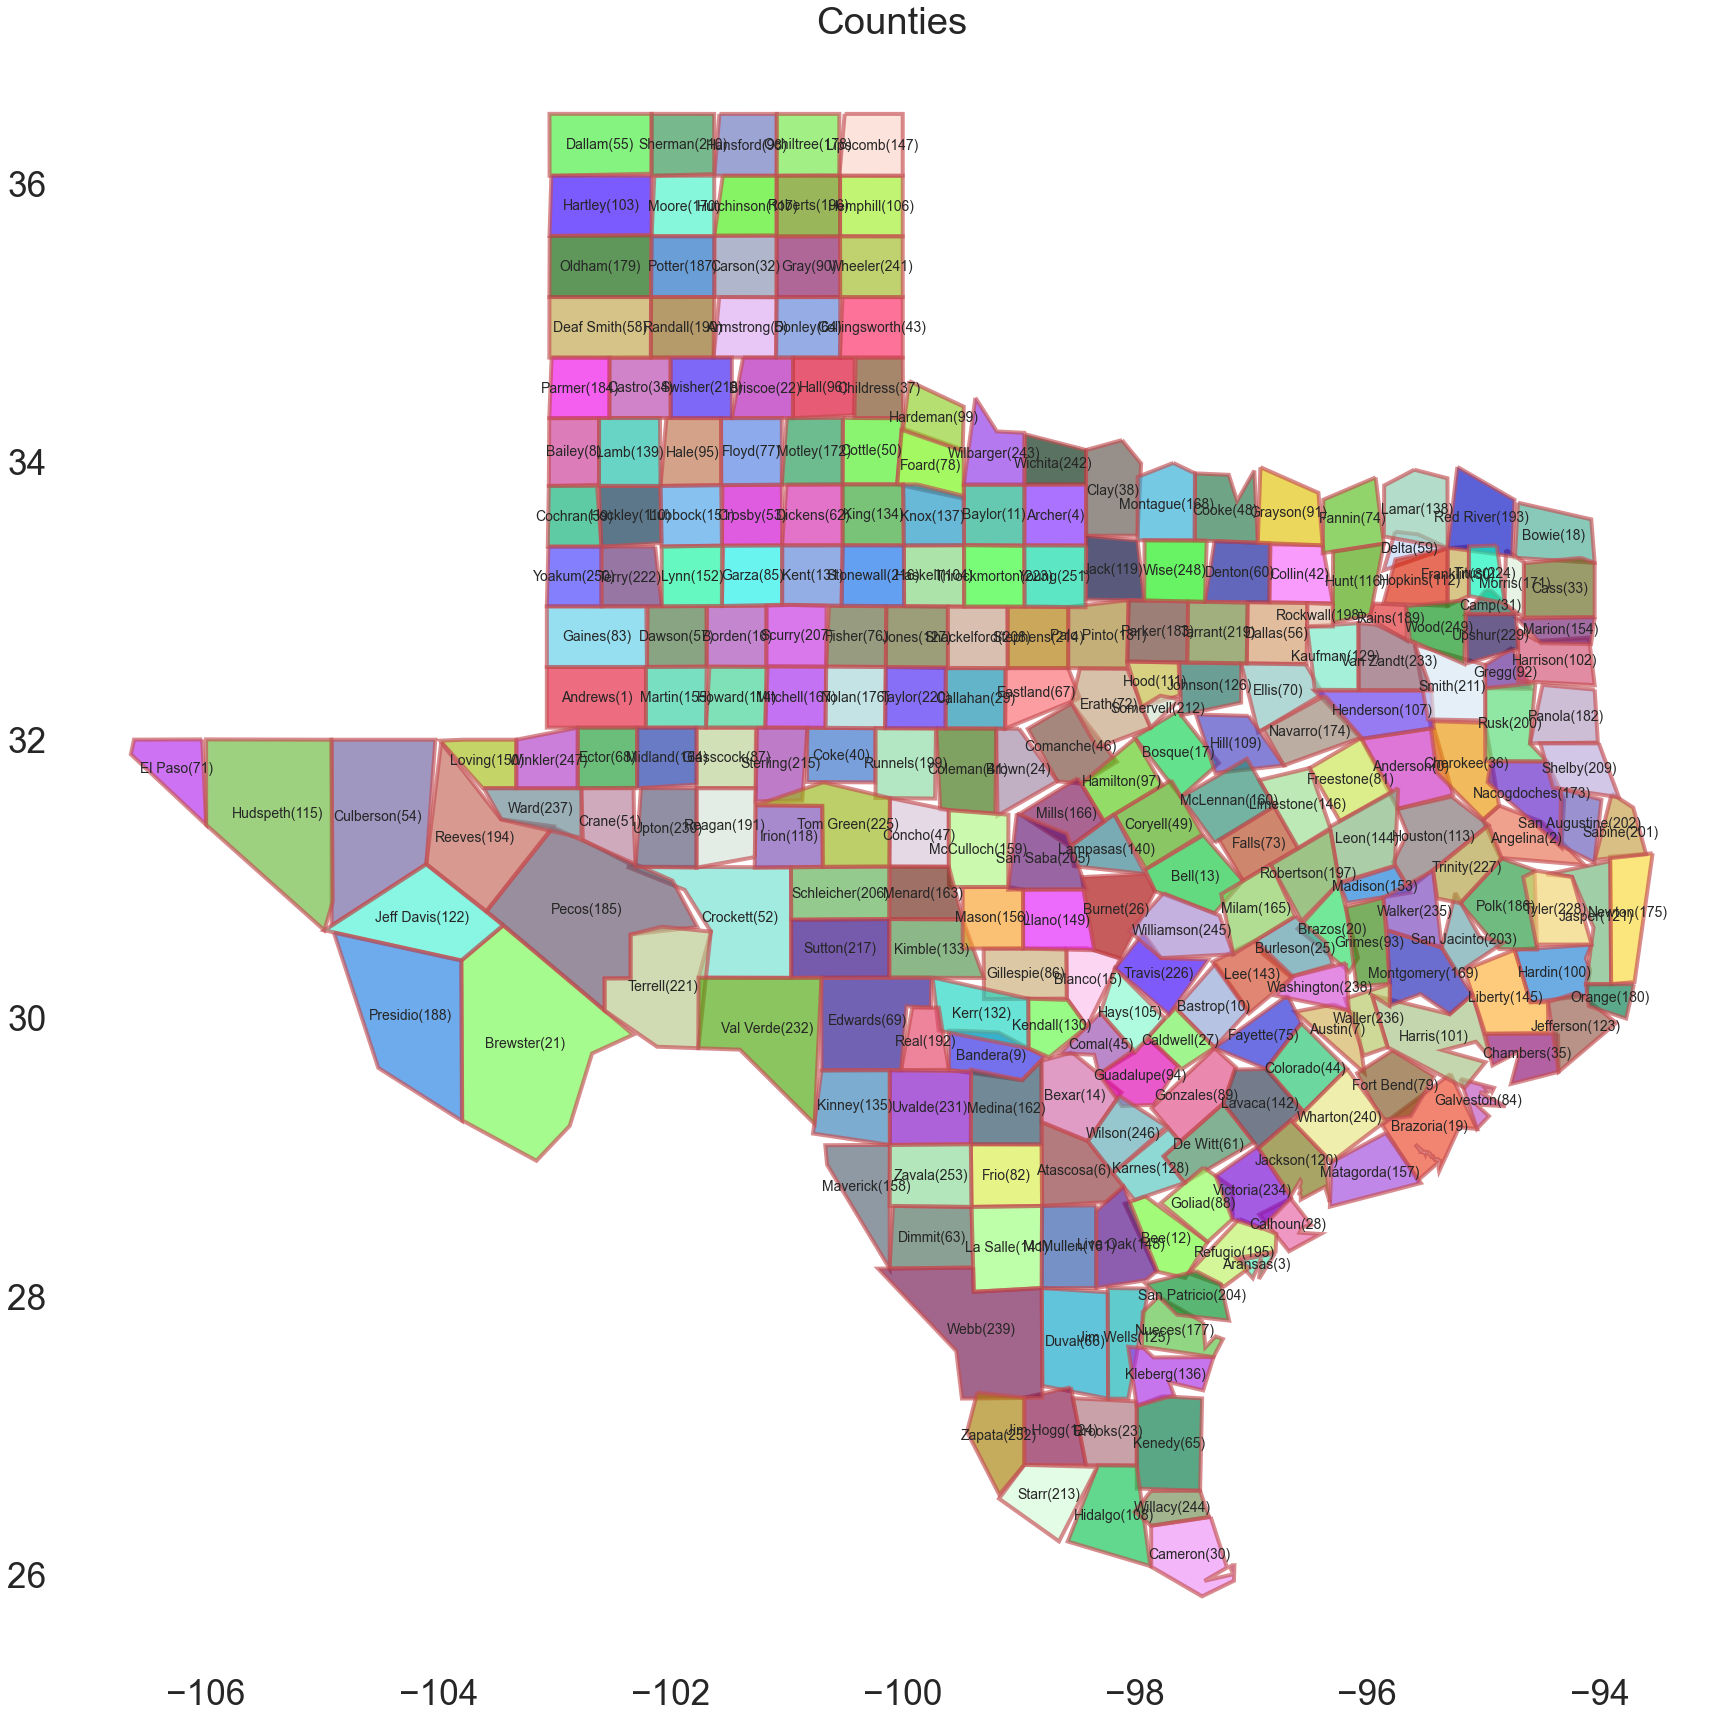

In [19]:
fig = plt.figure(figsize=(30, 30))
# plt.axis([x_min, x_max, y_min, y_max])
plt.autoscale(enable=True, axis='both')
plt.gca().set_facecolor("white")

data_view_t = 40
        
def plot_county():
    ax = fig.gca() 
    for i in range(len(new_county_polys)):
        poly = new_county_polys[i][0]
        ax.add_patch(PolygonPatch(poly, fill=True, fc=np.random.rand(3,), ec='r', alpha=0.65, zorder=2, linewidth=4))
        plt.text(poly.centroid.xy[0][0], poly.centroid.xy[1][0], new_county_nms[i] + '(' + str(i) + ')', ha='center', va='center', fontsize='14')
        
#         plt.text()
    


# plot_tri()
plot_county()
plt.title('Counties')
# plt.savefig('plot_district_simple_cases_{}_{}.pdf'.format(covid_data_tdate[data_view_t].date(), mesh_fname))

# Test script

In [11]:
from read_county_data import *

In [12]:
new_county_nms, new_county_dist, new_county_dist_names, new_county_polys = read_county_map()

In [13]:
new_county_nms_check, new_county_dist_check, new_county_dist_names_check, new_county_polys_check = read_county_data()

In [6]:
err_sum = 0
for i in range(len(new_county_nms_check)):
    if new_county_nms_check[i] != new_county_nms[i]:
        err_sum += 1
    if new_county_dist_check[i] != new_county_dist[i]:
        err_sum += 1
    if new_county_dist_names_check[i] != new_county_dist_names[i]:
        err_sum += 1
        
print("total err: {}".format(err_sum))

total err: 0
